In [325]:
#import dependencies
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import requests
import numpy
from datetime import datetime
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [326]:
# Load the track and field CSV file into a Pandas DataFrame
olympic_track_data = pd.read_csv("results.csv")

olympic_track_data.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8


In [327]:
# Load the athlete events CSV file into a Pandas DataFrame
olympic_athletes_data = pd.read_csv("athlete_events.csv")

olympic_athletes_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [328]:
# Load the NOC CSV file into a Pandas DataFrame
NOC_data = pd.read_csv("noc_regions.csv")

NOC_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [329]:
distance_df = olympic_track_data.loc[(olympic_track_data['Event']=="10000M Men") | (olympic_track_data['Event']=="10000M Women")|
                                     (olympic_track_data['Event']=="1500M Women")|(olympic_track_data['Event']=="1500M Men") |
                                     (olympic_track_data['Event']=="3000M Women")|(olympic_track_data['Event']=="3000M Men") |
                                     (olympic_track_data['Event']=="4x400M Women")|(olympic_track_data['Event']=="4x400M Men") |
                                     (olympic_track_data['Event']=="5000M Women") | (olympic_track_data['Event']=="5000M Men")|
                                     (olympic_track_data['Event']=="800M Women") | (olympic_track_data['Event']=="800M Men") ]

#long_distance_df = olympic_track_data[(olympic_track_data['Event']=="Marathon Men") |(olympic_track_data['Event']=="Marathon Women")]
 
distance_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8


In [331]:
# Split the time strings into minutes, seconds, and hundredths for distance races

distance_df = distance_df.dropna(how="any")

seconds_result = []
minutes = ""
seconds = ""

for result in distance_df['Result']:
    time = datetime.strptime(result,"%M:%S.%f")

# Convert the components to integers
    minutes = time.minute
    seconds = time.second
    hundredths = time.microsecond
    total_seconds = minutes * 60 + seconds
    total_time = float(total_seconds) + hundredths/1000000

    seconds_result.append(total_time)

distance_df['Time']=seconds_result

distance_df.tail()


,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
2064,W,800M Women,Munich,1972,B,Gunhild HOFFMEISTER,GDR,01:59.2,119.2
2065,W,800M Women,Tokyo,1964,G,Ann PACKER,GBR,02:01.1,121.1
2066,W,800M Women,Tokyo,1964,S,Maryvonne DUPUREUR,FRA,02:01.9,121.9
2067,W,800M Women,Tokyo,1964,B,Ann Marise CHAMBERLAIN,NZL,02:02.8,122.8
2068,W,800M Women,Amsterdam,1928,G,"Karoline ""Lina"" RADKE",GER,02:16.8,136.8


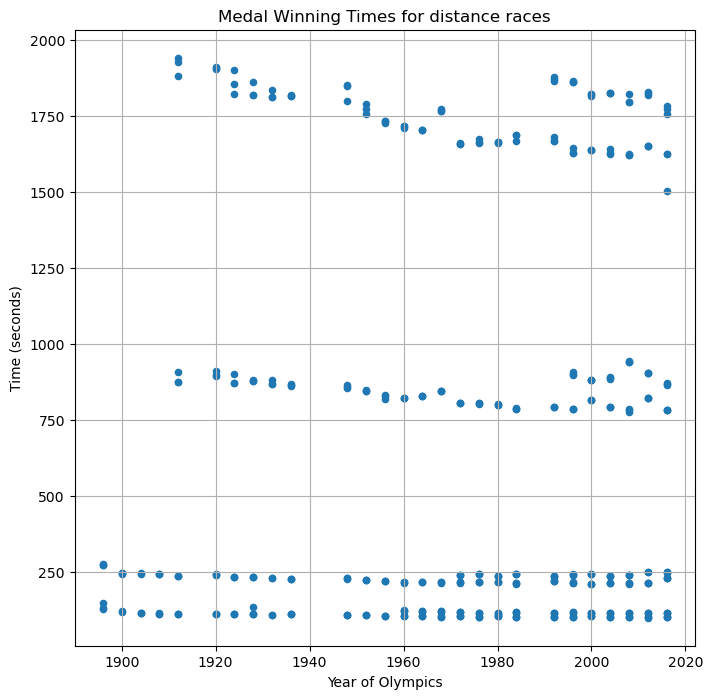

In [203]:
# all distance create scatter plot
distance_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for distance races",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/scatterplots/alldist.png")

# Show the plot
plt.show()



Make dataframes for individual events for plotting

In [204]:
ten_thousand_m_df = distance_df.loc[(distance_df['Event']=='10000M Men')]
ten_thousand_w_df = distance_df.loc[(distance_df['Event']=='10000M Women')]
eight_hundred_m_df = distance_df.loc[(distance_df['Event']=='800M Men')]
eight_hundred_w_df = distance_df.loc[(distance_df['Event']=='800M Women')]
fifteen_hundred_w_df = distance_df.loc[(distance_df['Event']=='1500M Women')]
fifteen_hundred_m_df = distance_df.loc[(distance_df['Event']=='1500M Men')]
five_thousand_w_df = distance_df.loc[(distance_df['Event']=='5000M Women')]
five_thousand_m_df = distance_df.loc[(distance_df['Event']=='5000M Men')]


five_thousand_w_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
2008,W,5000M Women,Rio,2016,G,Vivian Jepkemoi CHERUIYOT,KEN,14:26.2,866.2
2009,W,5000M Women,Rio,2016,S,Hellen Onsando OBIRI,KEN,14:29.8,869.8
2010,W,5000M Women,Rio,2016,B,Almaz AYANA,ETH,14:33.6,873.6
2011,W,5000M Women,Beijing,2008,G,Tirunesh DIBABA,ETH,15:41.4,941.4
2012,W,5000M Women,Beijing,2008,S,Elvan ABEYLEGESSE,TUR,15:42.7,942.7


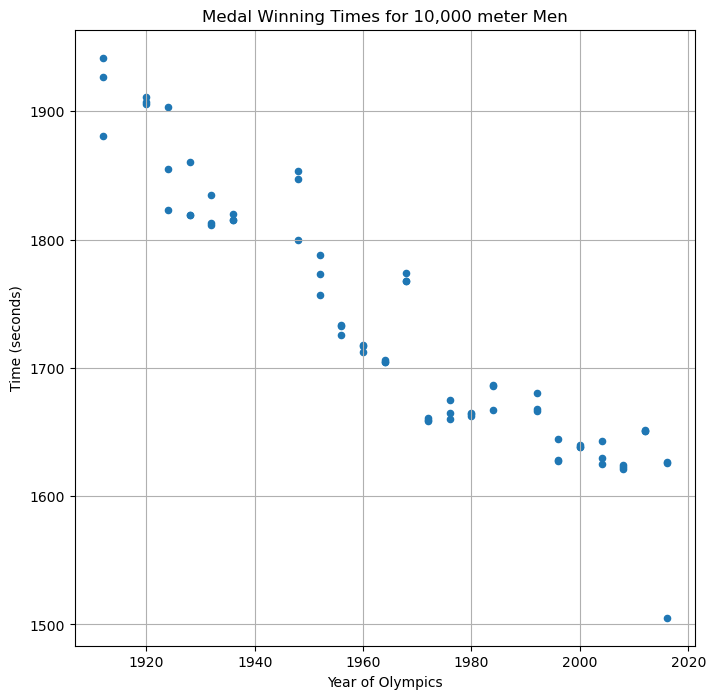

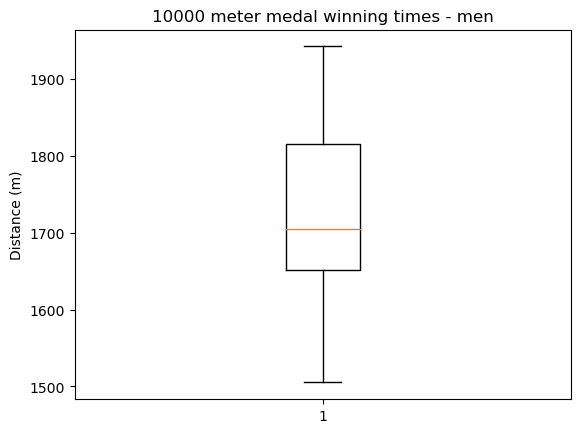

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2,1505.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6,1625.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3,1626.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2,1621.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8,1622.8


In [297]:
# ten thousand men create scatter plot
ten_thousand_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 10,000 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/scatterplots/10000men.png")

# Show the plot
plt.show()

# boxplot for 10000 m men
times = ten_thousand_m_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('10000 meter medal winning times - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/10000m_men.png")

plt.show()

ten_thousand_m_df.head()



The gold medal time in 2016 looks like it could be an outlier in the scatter plot, but doesn't meet the requirements of being an outlier as shown by the boxplot.

In [304]:
stats.ttest_1samp(times[0],times.mean())

TtestResult(statistic=nan, pvalue=nan, df=0)

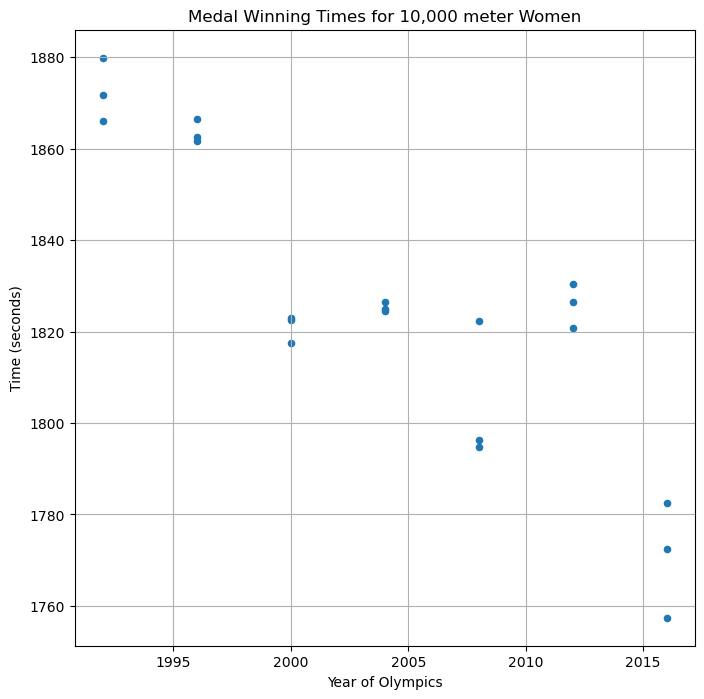

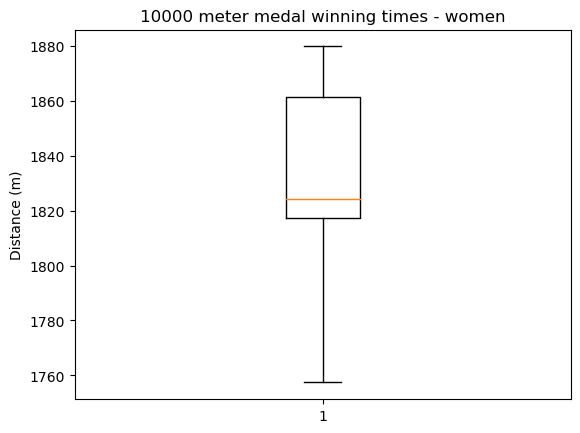

In [277]:
# ten thousand m women create scatter plot
ten_thousand_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 10,000 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")
#save the plot
plt.savefig("output_files/scatterplots/10000women.png")

# Show the plot
plt.show()

# boxplot for 10000 m women
times = ten_thousand_w_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('10000 meter medal winning times - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/10000m_women.png")

plt.show()

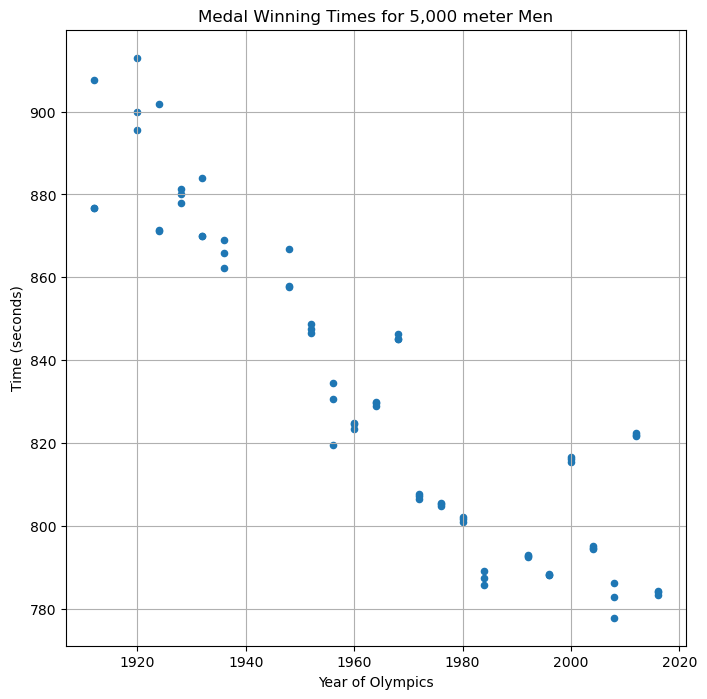

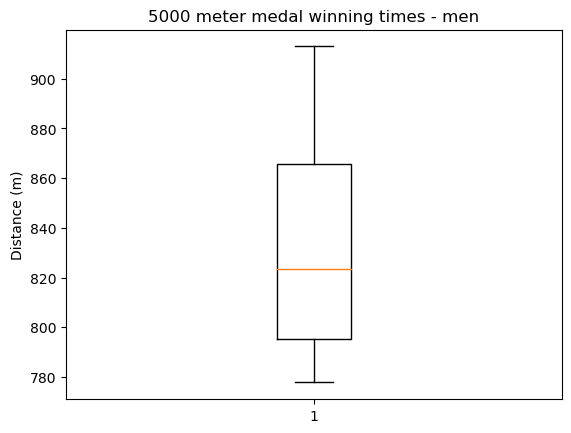

In [276]:
# five thousand men create scatter plot
five_thousand_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 5,000 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/scatterplots/5000men.png")

# Show the plot
plt.show()

# boxplot for 5000 m men
times = five_thousand_m_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('5000 meter medal winning times - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/5000m_men.png")

plt.show()

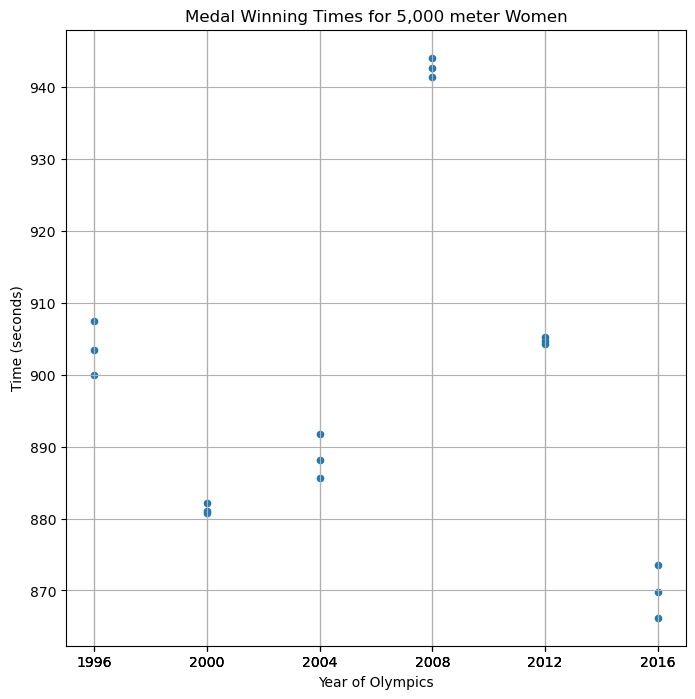

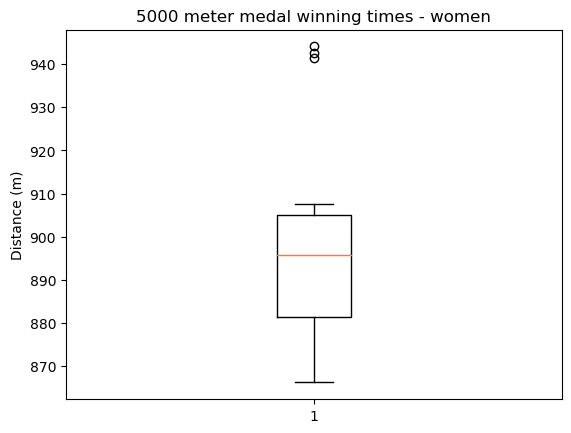

In [275]:
# five thousand women create scatter plot
five_thousand_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 5,000 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)",xticks=five_thousand_w_df['Year'])

#save the plot
plt.savefig("output_files/scatterplots/5000women.png")

# Show the plot
plt.show()

# boxplot for 5000 m women
times = five_thousand_w_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('5000 meter medal winning times - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/5000m_women.png")

plt.show()

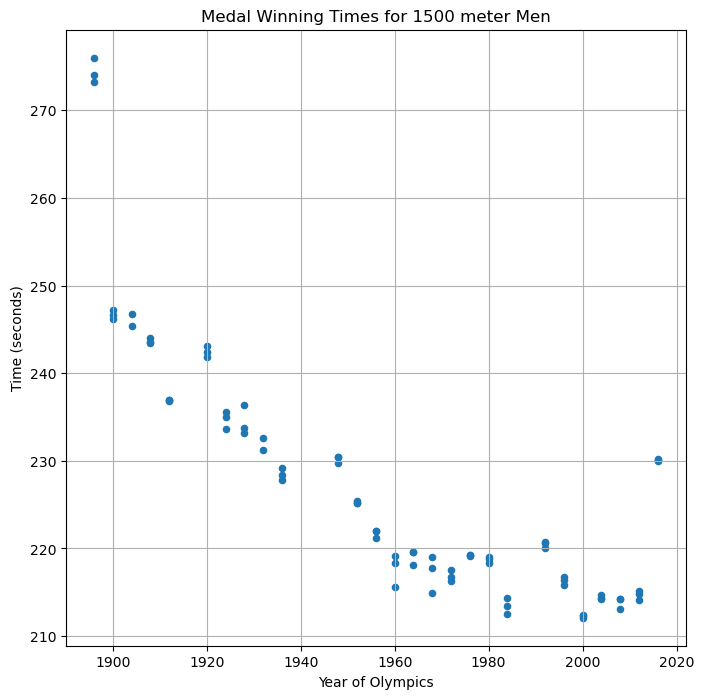

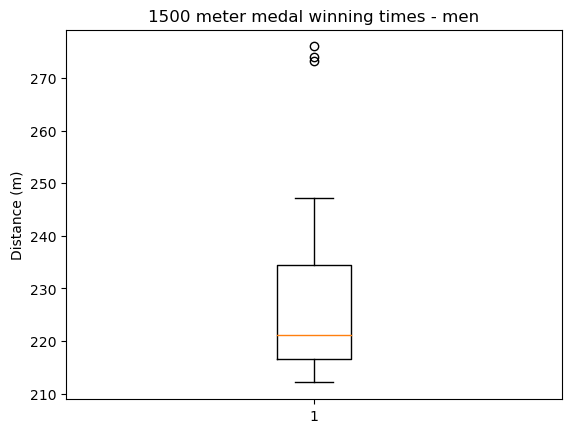

In [273]:
# fifteen hundred men create scatter plot
fifteen_hundred_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 1500 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/scatterplots/1500men.png")

# Show the plot
plt.show()

# boxplot for 1500 m women
times = fifteen_hundred_m_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('1500 meter medal winning times - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/1500m_men.png")

plt.show()

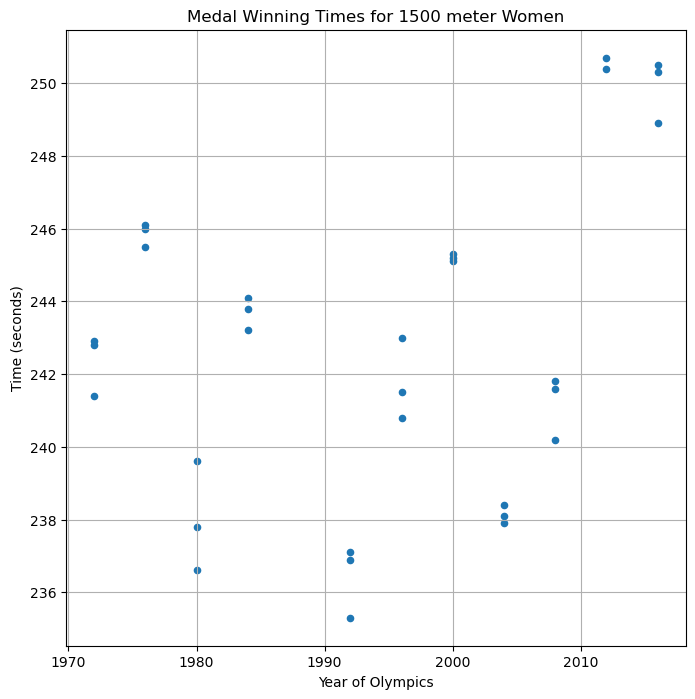

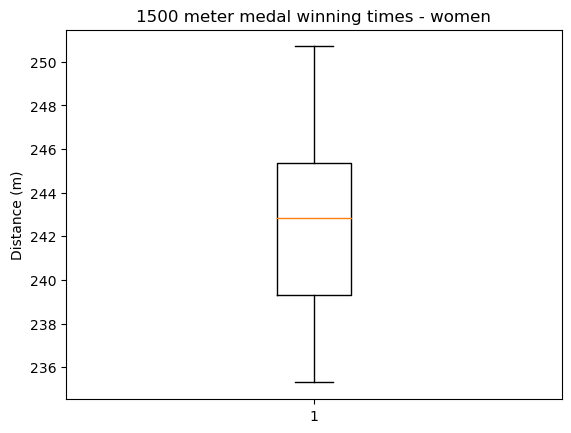

In [272]:
# fifteen hundred women create scatter plot
fifteen_hundred_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 1500 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/scatterplots/1500women.png")

# Show the plot
plt.show()

# boxplot for 1500 m women
times = fifteen_hundred_w_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('1500 meter medal winning times - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/1500m_women.png")

plt.show()


800 m Men

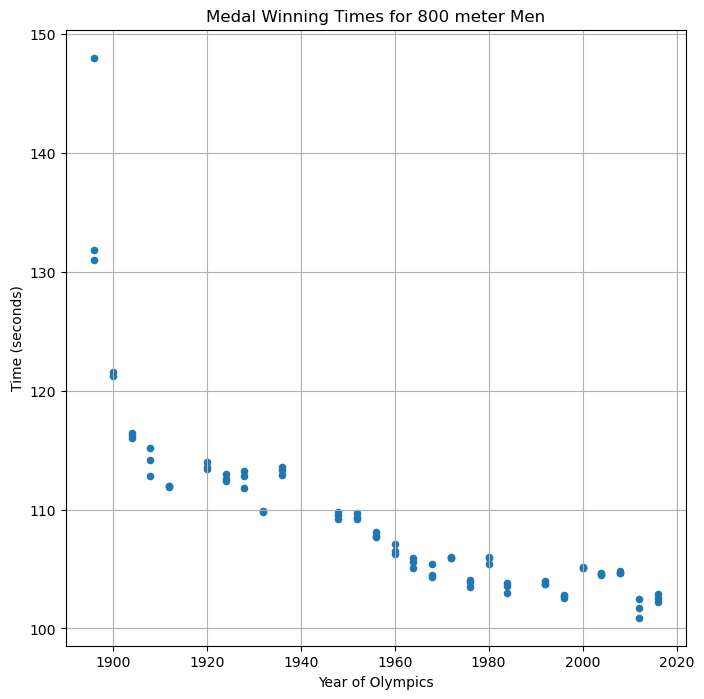

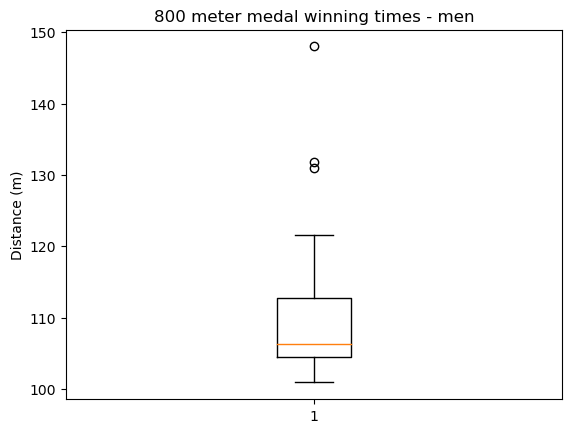

In [271]:
# eight hundred men create scatter plot
eight_hundred_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 800 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/scatterplots/800men.png")

# Show the plot
plt.show()

# boxplot for 800 m women
times = eight_hundred_m_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('800 meter medal winning times - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/800m_men.png")

plt.show()

800 m Women

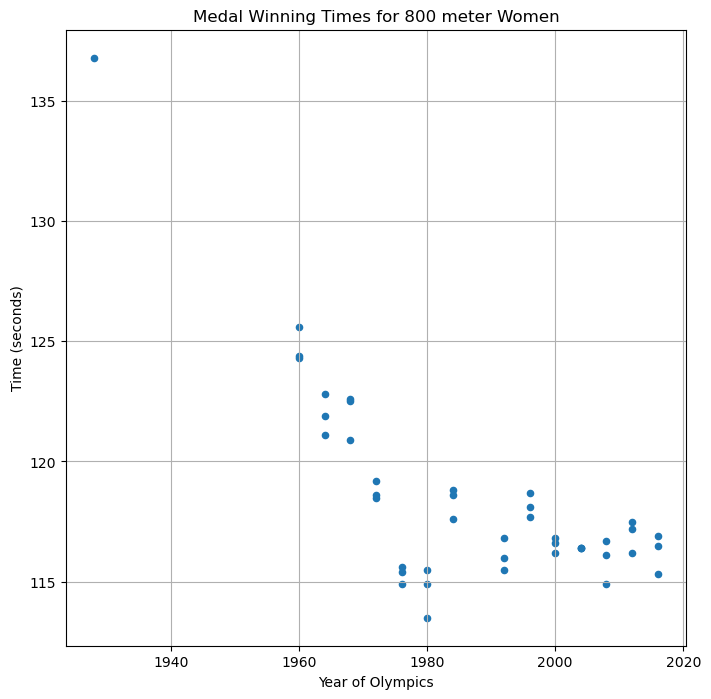

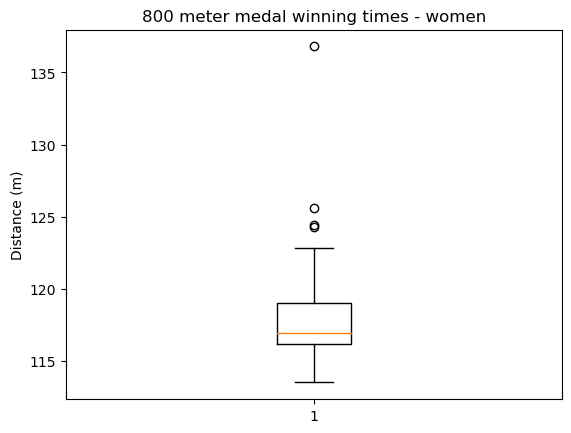

In [270]:
# eight hundred women create scatter plot
eight_hundred_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 800 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/scatterplots/800women.png")

# Show the plot
plt.show()

# boxplot for 800 m women
times = eight_hundred_w_df['Time']
fig1, ax1 = plt.subplots()
ax1.set_title('800 meter medal winning times - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/800m_women.png")

plt.show()

JUMPS
Filter the Jumps data into a dataframe and clean the results - changing results into float values for height

In [213]:
jumps_df = olympic_track_data.loc[(olympic_track_data['Event']=="High Jump Men") | (olympic_track_data['Event']=="High Jump Women")|
                                     (olympic_track_data['Event']=="Pole Vault Women")|(olympic_track_data['Event']=="Pole Vault Men") |
                                     (olympic_track_data['Event']=="Long Jump Women")|(olympic_track_data['Event']=="Long Jump Men") |
                                     (olympic_track_data['Event']=="Triple Jump Women")|(olympic_track_data['Event']=="Triple Jump Men")
                                    ]

height = []
for result in jumps_df['Result']:
    high = float(result)
    height.append(high)

jumps_df['height']=height
jumps_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,height
1200,M,High Jump Men,Rio,2016,G,Derek DROUIN,CAN,2.38,2.38
1201,M,High Jump Men,Rio,2016,S,Mutaz Essa BARSHIM,QAT,2.36,2.36
1202,M,High Jump Men,Rio,2016,B,Bohdan BONDARENKO,UKR,2.33,2.33
1203,M,High Jump Men,Beijing,2008,G,Andrey SILNOV,RUS,2.36,2.36
1204,M,High Jump Men,Beijing,2008,S,Germaine MASON,GBR,2.34,2.34


setting up Jump dataframes for plotting

In [214]:
high_jump_m_df = jumps_df.loc[(jumps_df['Event']=='High Jump Men')]
high_jump_w_df = jumps_df.loc[(jumps_df['Event']=='High Jump Women')]
long_jump_m_df = jumps_df.loc[(jumps_df['Event']=='Long Jump Men')]
long_jump_w_df = jumps_df.loc[(jumps_df['Event']=='Long Jump Women')]
triple_jump_m_df = jumps_df.loc[(jumps_df['Event']=='Triple Jump Men')]
triple_jump_w_df = jumps_df.loc[(jumps_df['Event']=='Triple Jump Women')]
pole_vault_m_df = jumps_df.loc[(jumps_df['Event']=='Pole Vault Men')]
pole_vault_w_df = jumps_df.loc[(jumps_df['Event']=='Pole Vault Women')]

In [282]:
# clean women's high jump results of NA Results
high_jump_w_df = high_jump_w_df.dropna(how="any")

High Jump Men = plot

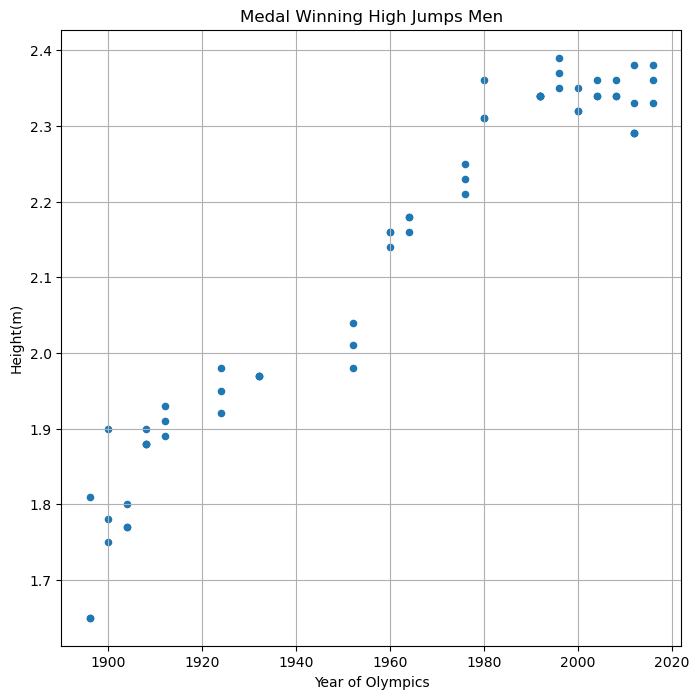

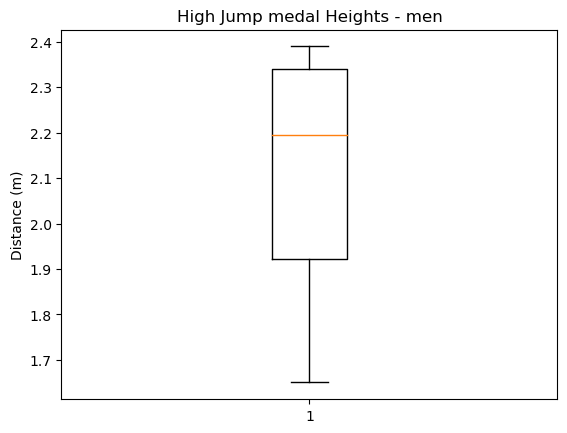

In [279]:
# high jump men create scatter plot
high_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning High Jumps Men",xlabel = "Year of Olympics", ylabel = "Height(m)")

#save the plot
plt.savefig("output_files/scatterplots/high_jump_men.png")

# Show the plot
plt.show()

# outlier plot of high jump medal distances women

times = high_jump_m_df['height']
fig1, ax1 = plt.subplots()
ax1.set_title('High Jump medal Heights - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/highjump_men.png")

plt.show()

In [ ]:
# high jump women create scatter plot
high_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning High Jumps Women",xlabel = "Year of Olympics", ylabel = "Height(m)")

#save the plot
plt.savefig("output_files/scatterplots/high_jump_women.png")

# Show the plot
plt.show()

# outlier plot of high jump medal heights women

times = high_jump_w_df["height"]
fig1, ax1 = plt.subplots()
ax1.set_title('High Jump medal Heights - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/highjump_women.png")

plt.show()

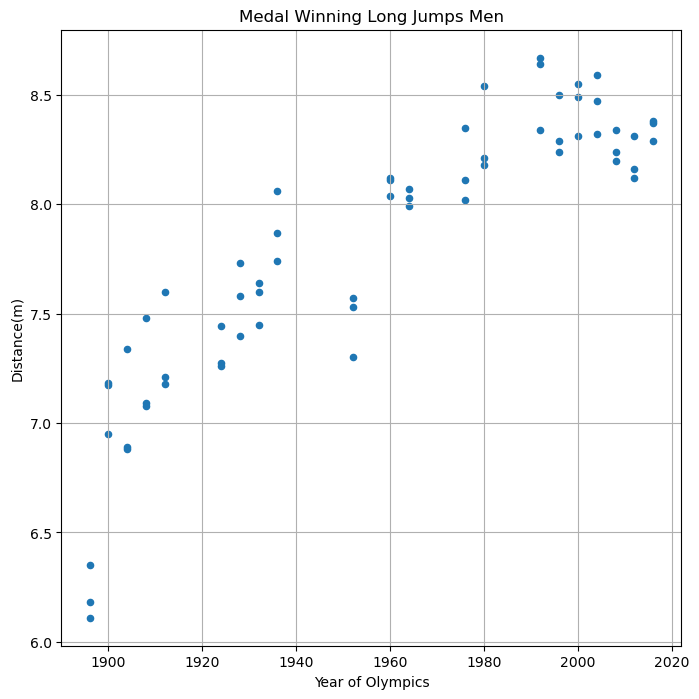

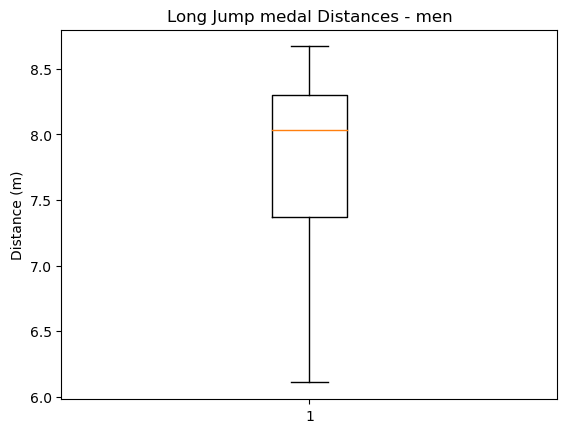

In [263]:
# long jump men create scatter plot
long_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Long Jumps Men",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/scatterplots/long_jump_men.png")

# Show the plot
plt.show()

# outlier plot of long jump medal distances women

times = long_jump_m_df['height']
fig1, ax1 = plt.subplots()
ax1.set_title('Long Jump medal Distances - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/longjump_men.png")

plt.show()

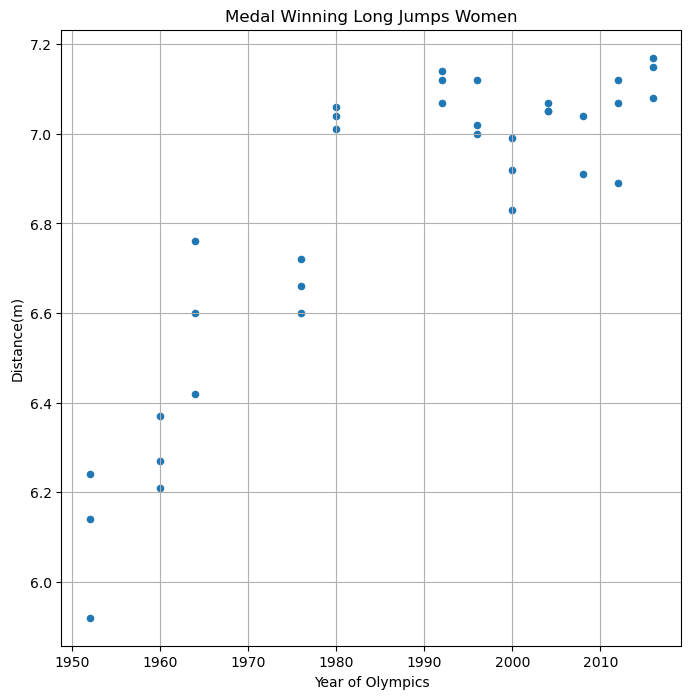

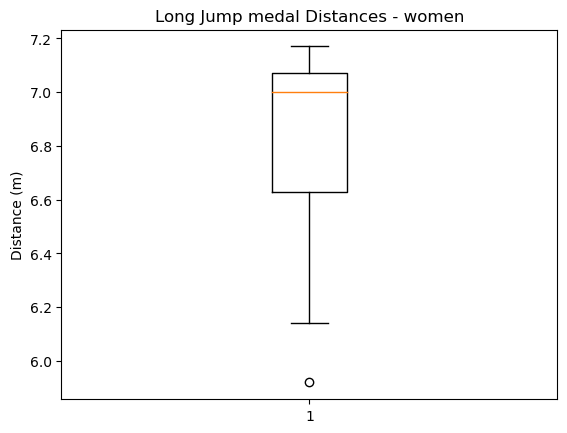

In [262]:
# long jump women create scatter plot
long_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Long Jumps Women",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/scatterplots/long_jump_women.png")

# Show the plot
plt.show()

# outlier plot of long jump medal distances women

times = long_jump_w_df['height']
fig1, ax1 = plt.subplots()
ax1.set_title('Long Jump medal Distances - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/longjump_women.png")

plt.show()

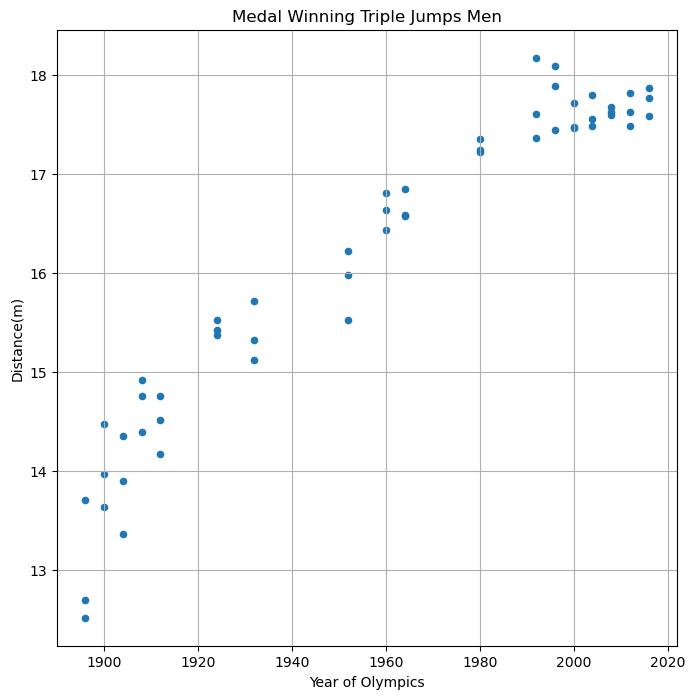

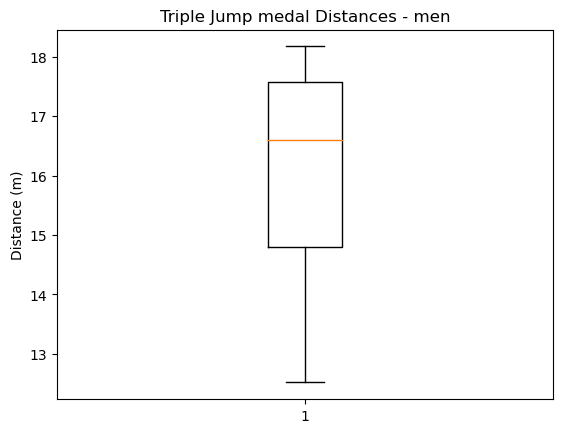

In [261]:
# triple jump men create scatter plot
triple_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Triple Jumps Men",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/scatterplots/triple_jump_men.png")

# Show the plot
plt.show()

# outlier plot of triple jump medal distances men

times = triple_jump_m_df['height']
fig1, ax1 = plt.subplots()
ax1.set_title('Triple Jump medal Distances - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/triplejump_men.png")

plt.show()

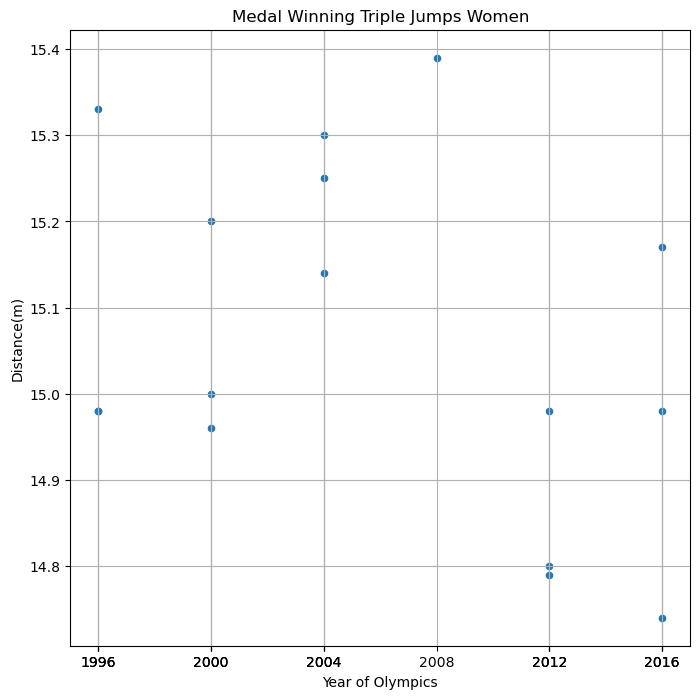

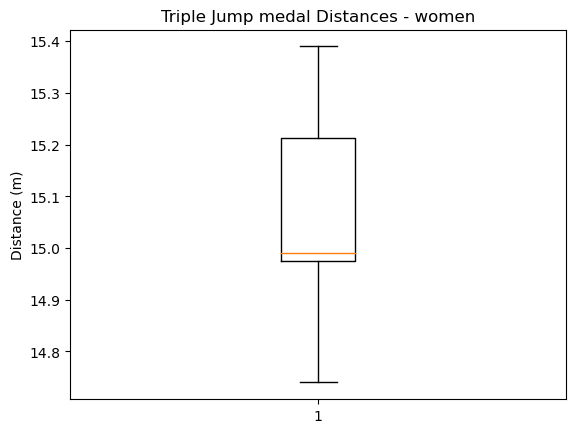

In [260]:
# triple jump women create scatter plot
triple_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Triple Jumps Women",xlabel = "Year of Olympics", ylabel = "Distance(m)",xticks=triple_jump_w_df['Year'])

#save the plot
plt.savefig("output_files/scatterplots/triple_jump_women.png")

# Show the plot
plt.show()

# outlier plot of triple jump medal distances women

times = triple_jump_w_df['height']
fig1, ax1 = plt.subplots()
ax1.set_title('Triple Jump medal Distances - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/triplejump_women.png")

plt.show()

In [ ]:
# pole vault men create scatter plot
pole_vault_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Pole Vaults Men",xlabel = "Year of Olympics", ylabel = "Height (m)")

#save the plot
plt.savefig("output_files/scatterplots/pole_vault_men.png")

# Show the plot
plt.show()

# outlier plot of pole vault medal heights men

times = pole_vault_m_df['height']
fig1, ax1 = plt.subplots()
ax1.set_title('pole vault medal heights - men')
ax1.set_ylabel('Height (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/polevault_men.png")

plt.show()


the Men's pole vault results from 1980 onward seem to form a different group than the previous results.  Is this pole technology?  Or something else?

#make a dataframe with only years 1980 - 2016

recent_pole_m_df = pole_vault_m_df.loc[pole_vault_m_df['height']>=5.5]
recent_pole_m_df_reset = recent_pole_m_df.reset_index(drop=True)

I can't get the t-test to work

samp = []
pop = []
i = 0
while i < len(recent_pole_m_df_reset-1):
    samp.append(recent_pole_m_df_reset['height'].values[i])
    i += 1

print(samp)
print(times)
stats.ttest_1samp(samp,times.mean())

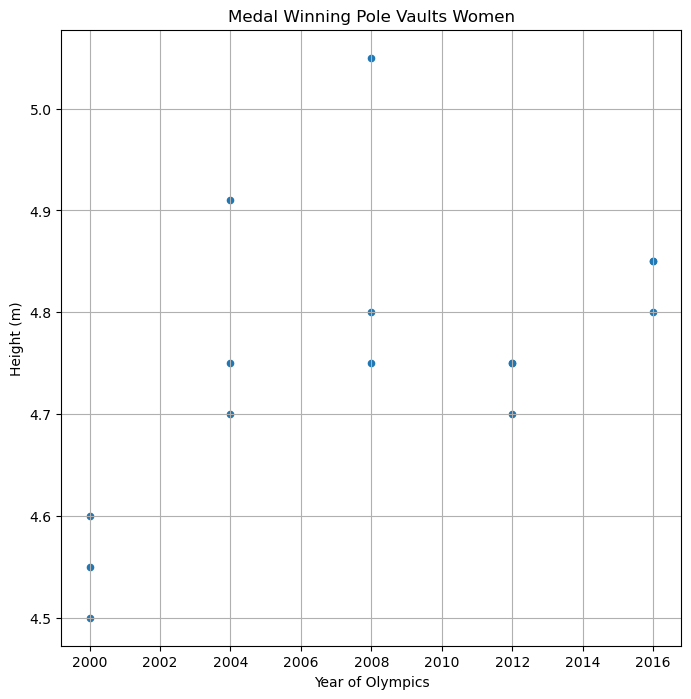

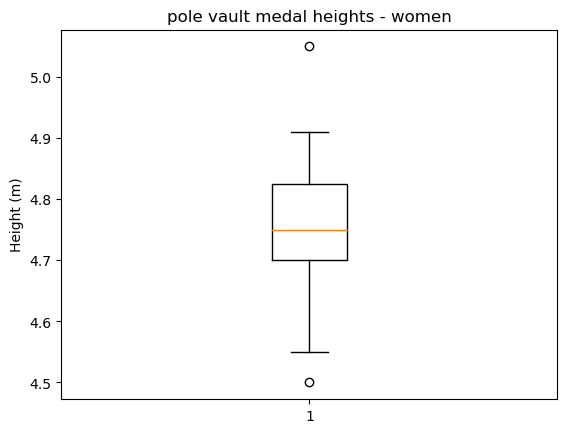

In [258]:
# pole vault women create scatter plot
pole_vault_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Pole Vaults Women",xlabel = "Year of Olympics", ylabel = "Height (m)")

#save the plot
plt.savefig("output_files/scatterplots/pole_vault_women.png")

# Show the plot
plt.show()

# outlier plot of pole vault medal heights women

times = pole_vault_w_df['height']
fig1, ax1 = plt.subplots()
ax1.set_title('pole vault medal heights - women')
ax1.set_ylabel('Height (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/polevault_women.png")

plt.show()

An Exceptional pole vault result in 2008 - above 5.0 meters for the gold

Filter the sprints into a database and clean up the results - make into float

In [223]:
sprints_df = olympic_track_data.loc[(olympic_track_data['Event']=="100M Men") | (olympic_track_data['Event']=="100M Women")|
                                     (olympic_track_data['Event']=="200M Women")|(olympic_track_data['Event']=="200M Men") |
                                     (olympic_track_data['Event']=="400M Women")|(olympic_track_data['Event']=="400M Men") |
                                     (olympic_track_data['Event']=="100M Hurdles Women")|(olympic_track_data['Event']=="110M Hurdles Men") |
                                     (olympic_track_data['Event']=="400M Hurdles Women")|(olympic_track_data['Event']=="400M Hurdles Men")]

sprints_df = sprints_df.dropna(how="any")

#clean results in format with 00: for minutes in front of seconds
sprints_df['Result'] = sprints_df['Result'].str.replace('^00:', '',regex=True)

quicktime = []

for result in sprints_df['Result']:
    bolt = float(result)
    quicktime.append(bolt)

sprints_df['time']=quicktime


set up sprint dataframes for plotting

In [225]:
one_hundred_m_df = sprints_df.loc[(sprints_df['Event']=='100M Men')]
one_hundred_w_df = sprints_df.loc[(sprints_df['Event']=='100M Women')]
two_hundred_m_df = sprints_df.loc[(sprints_df['Event']=='200M Men')]
two_hundred_w_df = sprints_df.loc[(sprints_df['Event']=='200M Women')]
four_hundred_m_df = sprints_df.loc[(sprints_df['Event']=='400M Men')]
four_hundred_w_df = sprints_df.loc[(sprints_df['Event']=='400M Women')]
one_hundred_hurdles_df = sprints_df.loc[(sprints_df['Event']=='100M Hurdles Women')]
one_ten_hurdles_df = sprints_df.loc[(sprints_df['Event']=='110M Hurdles Men')]
four_hundred_hurd_m_df = sprints_df.loc[(sprints_df['Event']=='400M Hurdles Men')]
four_hundred_hurd_w_df = sprints_df.loc[(sprints_df['Event']=='400M Hurdles Women')]

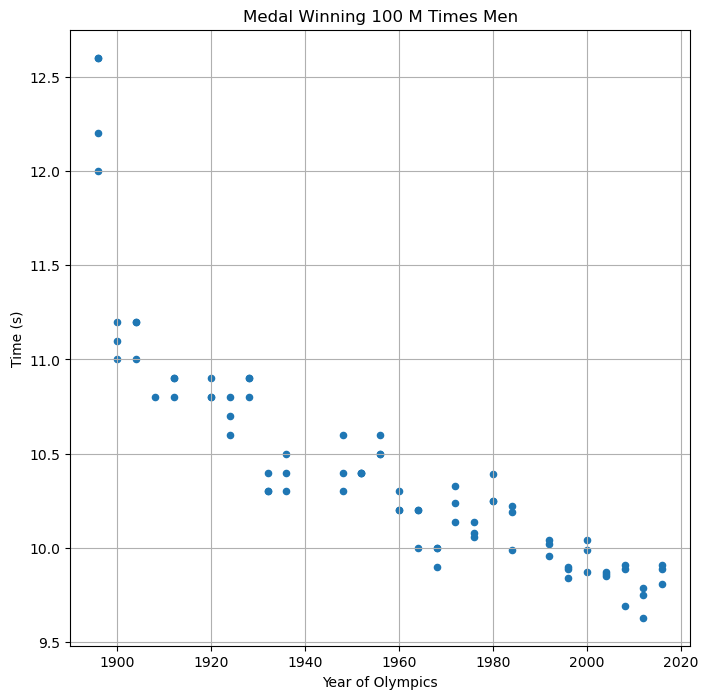

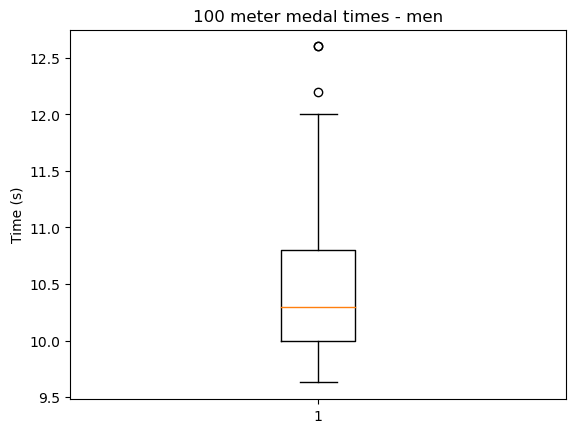

In [248]:
# 100 meter men create scatter plot
one_hundred_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 100 M Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/100_m_men.png")

# Show the plot
plt.show()

# outlier plot of 100 m men times

times = one_hundred_m_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('100 meter medal times - men')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/100_men.png")

plt.show()

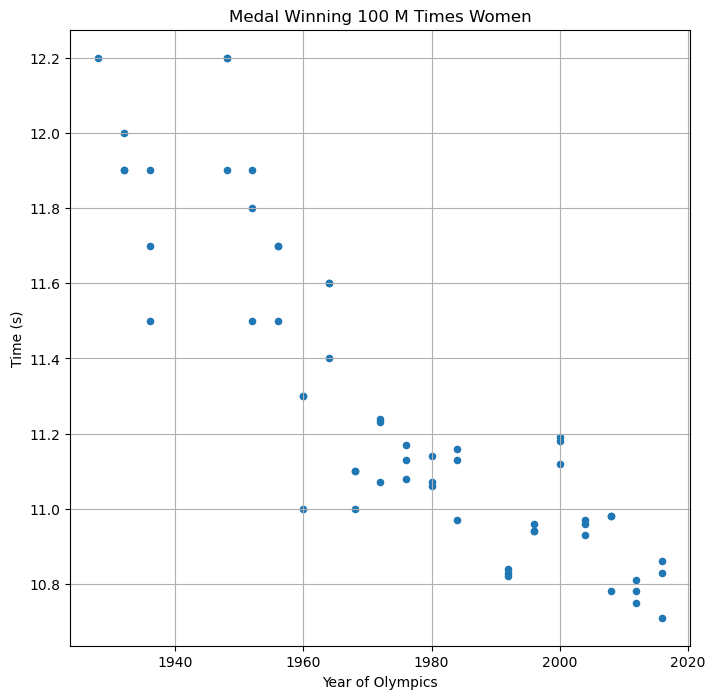

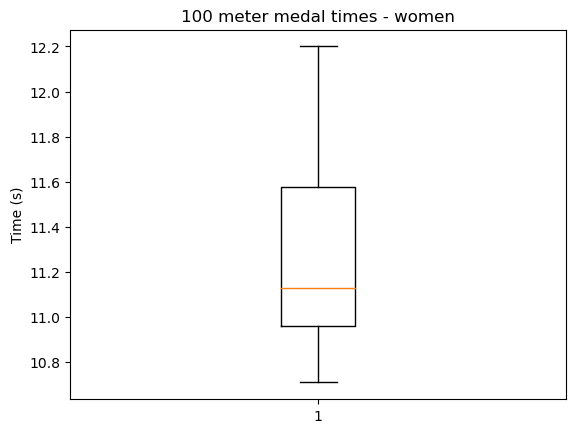

In [249]:
# 100 meter women create scatter plot
one_hundred_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 100 M Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/100_m_women.png")

# Show the plot
plt.show()

# outlier plot of 100 m women times

times = one_hundred_w_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('100 meter medal times - women')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/100_women.png")

plt.show()

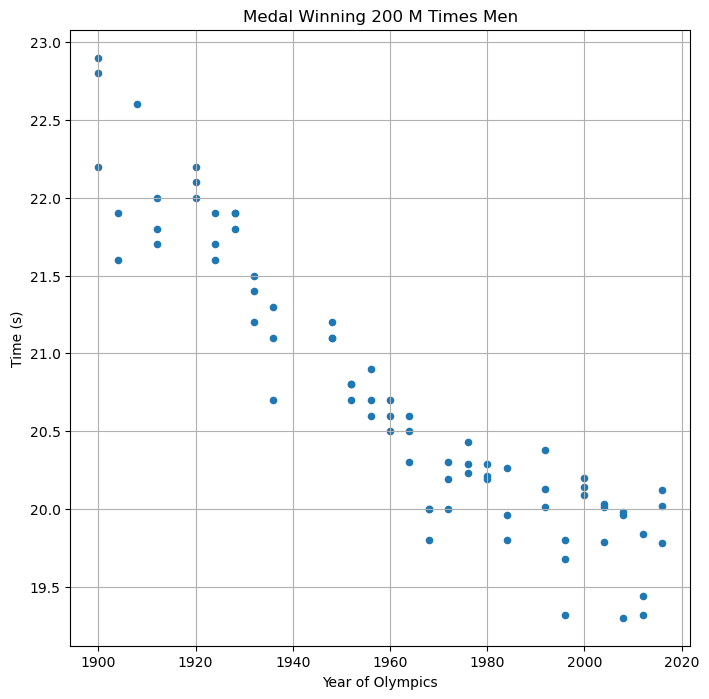

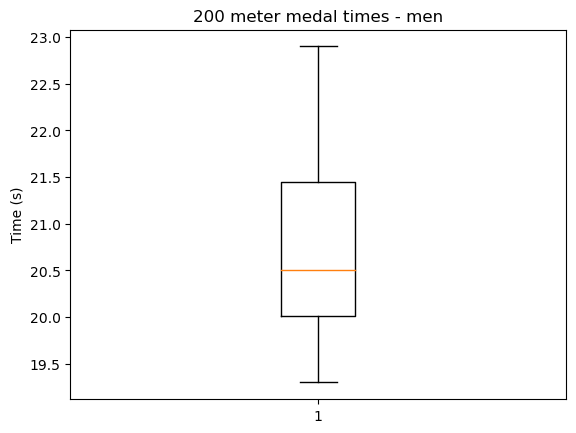

In [250]:
# 200 meter men create scatter plot
two_hundred_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 200 M Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/200_m_men.png")

# Show the plot
plt.show()

# outlier plot of 100 m men times

times = two_hundred_m_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('200 meter medal times - men')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/200_men.png")

plt.show()

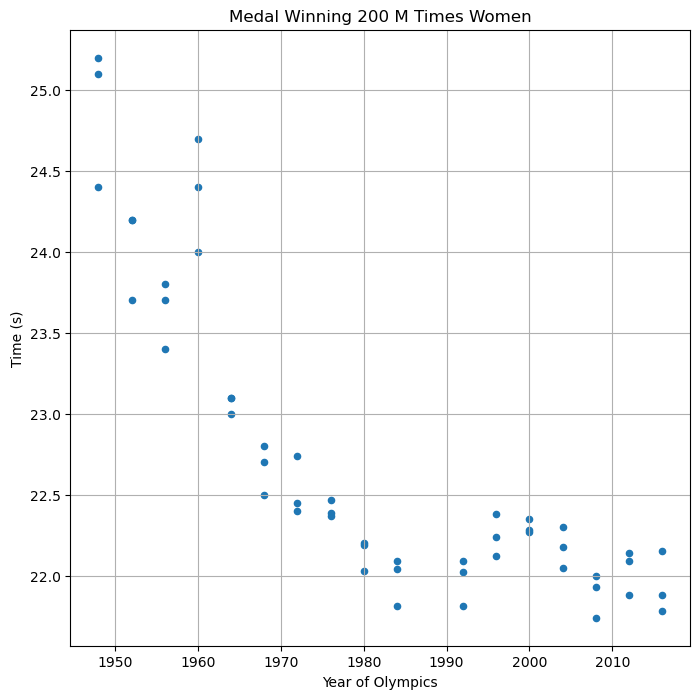

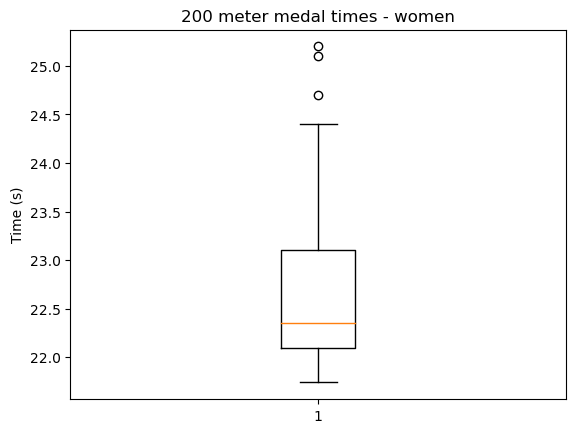

In [257]:
# 200 meter women create scatter plot
two_hundred_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 200 M Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/200_m_women.png")

# Show the plot
plt.show()

# outlier plot of 400 m men times

times = two_hundred_w_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('200 meter medal times - women')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/200_women.png")

plt.show()

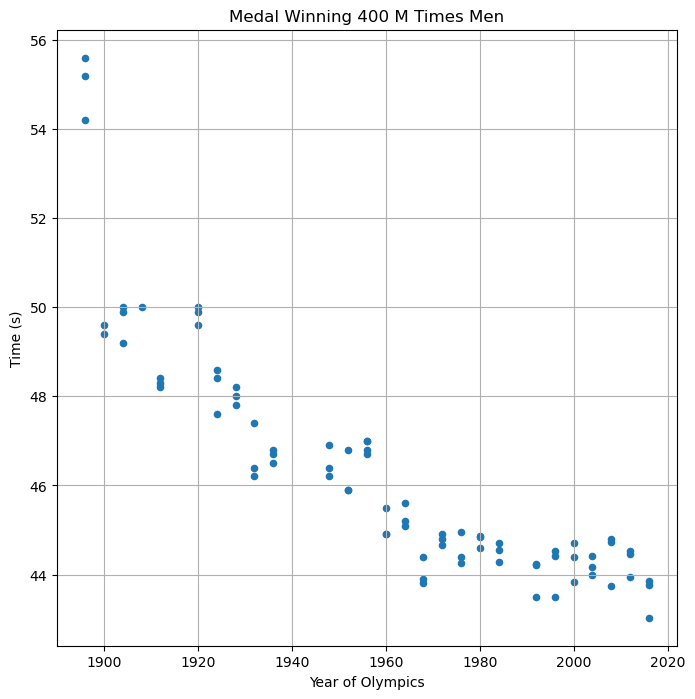

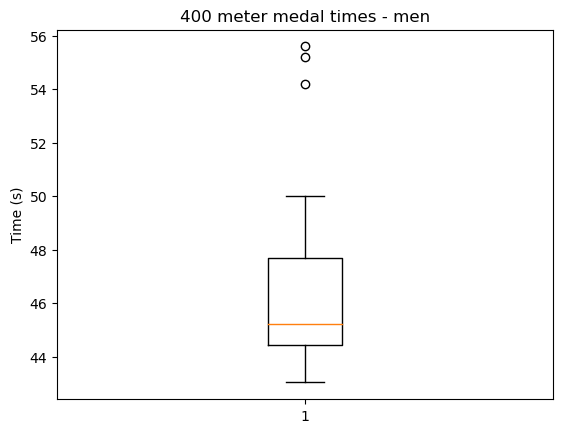

In [251]:
# 400 meter men create scatter plot
four_hundred_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/400_m_men.png")

# Show the plot
plt.show()

# outlier plot of 400 m men times

times = four_hundred_m_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('400 meter medal times - men')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/400_men.png")

plt.show()

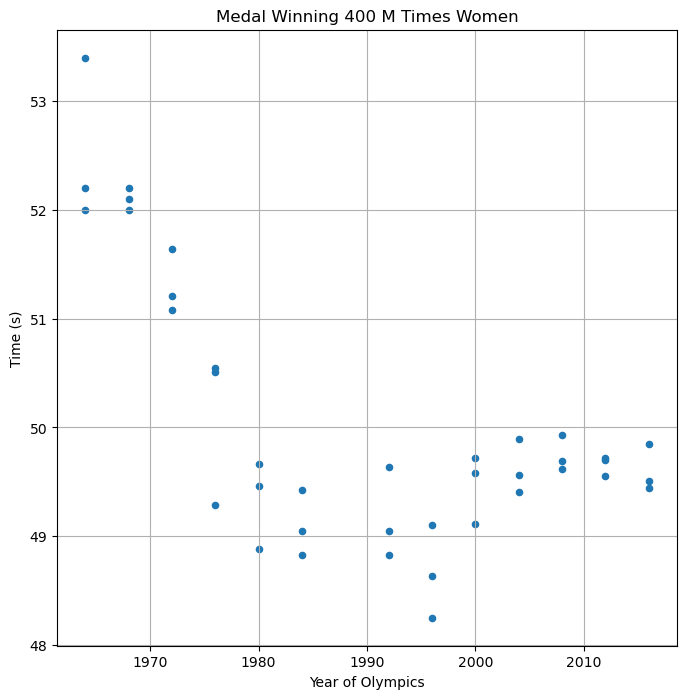

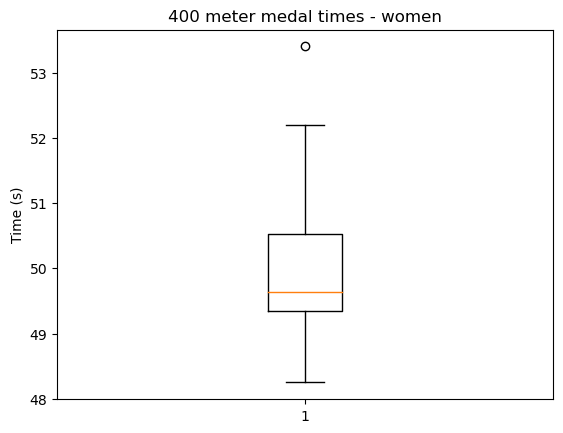

In [256]:
# 400 meter women create scatter plot
four_hundred_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/400_m_women.png")

# Show the plot
plt.show()

# outlier plot of 400 m women times

times = four_hundred_w_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('400 meter medal times - women')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/400_women.png")

plt.show()

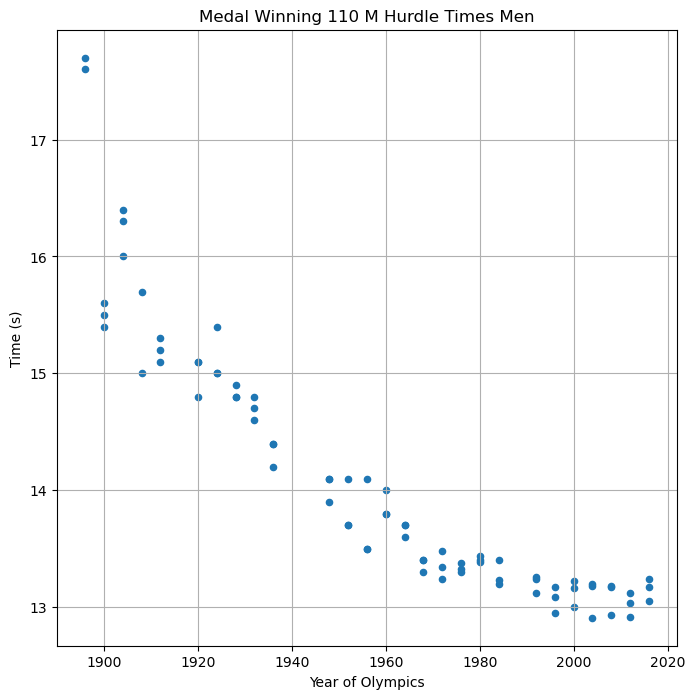

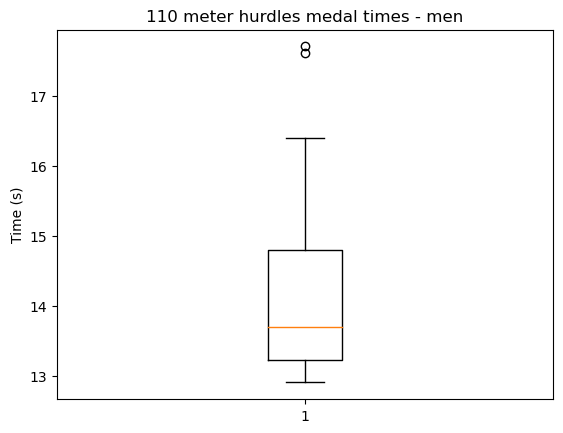

In [252]:
# 110 meter hurdlesmen create scatter plot
one_ten_hurdles_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 110 M Hurdle Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/110_m_hurdles.png")

# Show the plot
plt.show()

# outlier plot of 110 m hurdles men times

times = one_ten_hurdles_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('110 meter hurdles medal times - men')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/110_hurdles.png")

plt.show()

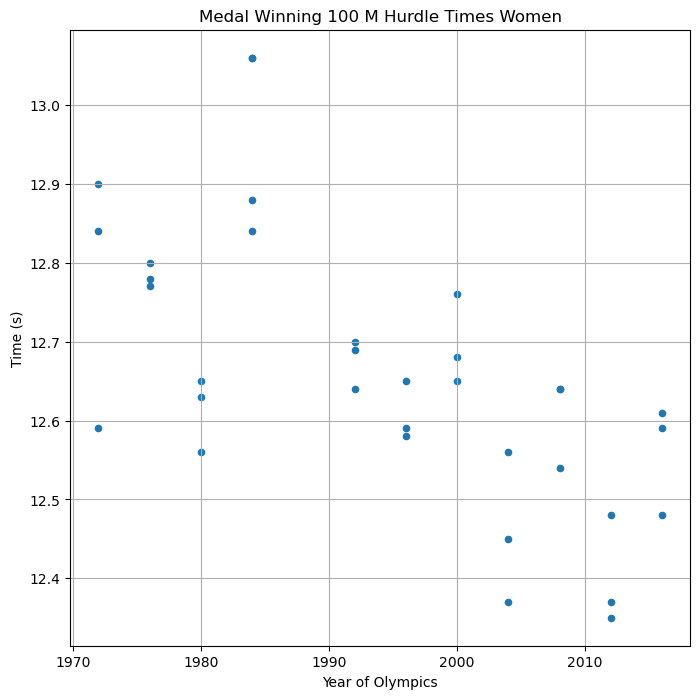

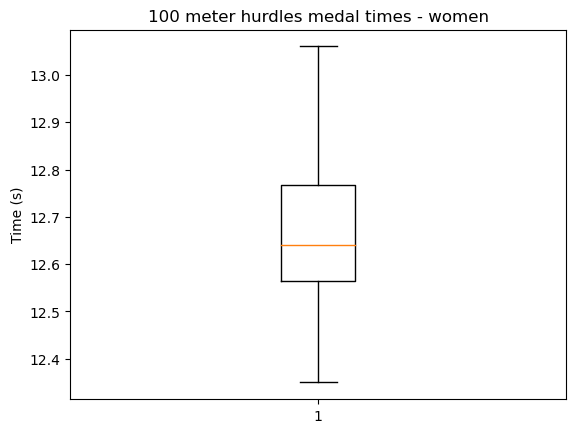

In [255]:
# 100 meter hurdle women create scatter plot
one_hundred_hurdles_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 100 M Hurdle Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/100_m_hurdles.png")

# Show the plot
plt.show()

# outlier plot of 400 m hurdles men times

times = one_hundred_hurdles_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('100 meter hurdles medal times - women')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/100_women_hurdles.png")

plt.show()

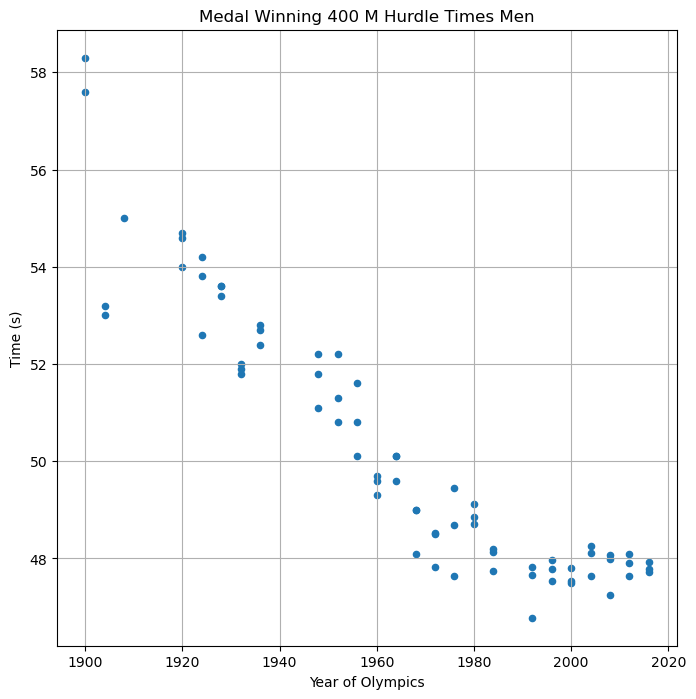

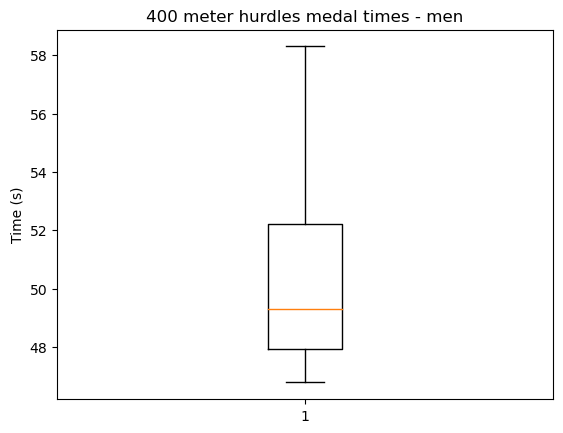

In [253]:
# 400 meter hurdle smen create scatter plot
four_hundred_hurd_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Hurdle Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/400_m_hurdles_men.png")

# Show the plot
plt.show()

# outlier plot of 400 m hurdles men times

times = four_hundred_hurd_m_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('400 meter hurdles medal times - men')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/400_men_hurdles.png")

plt.show()

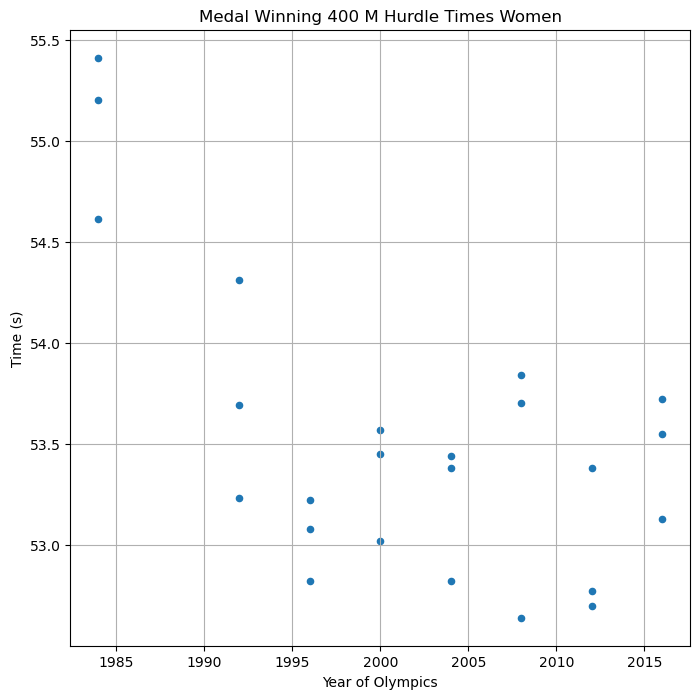

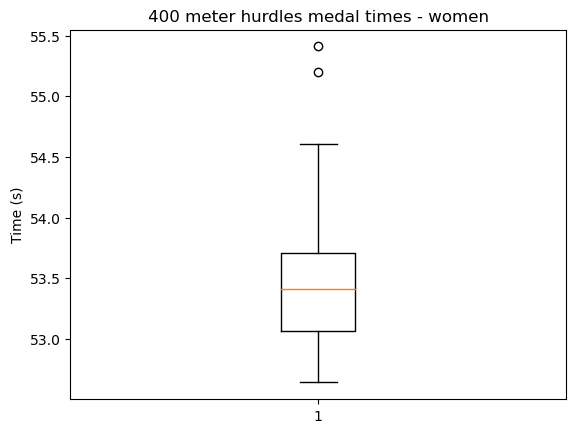

In [254]:
# 400 meter hurdle women create scatter plot
four_hundred_hurd_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Hurdle Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/scatterplots/400_m_hurdles_women.png")

# Show the plot
plt.show()

# outlier plot of 400 m hurdles women times

times = four_hundred_hurd_w_df['time']
fig1, ax1 = plt.subplots()
ax1.set_title('400 meter hurdles medal times - women')
ax1.set_ylabel('Time (s)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/400_women_hurdles.png")

plt.show()

Filter Throwing Events into a dataframe

In [284]:
throws_df = olympic_track_data.loc[(olympic_track_data['Event']=="Discus Throw Men") | (olympic_track_data['Event']=="Discus Throw Women")|
                                     (olympic_track_data['Event']=="Hammer Throw Women")|(olympic_track_data['Event']=="Hammer Throw Men") |
                                     (olympic_track_data['Event']=="Javelin Throw Women")|(olympic_track_data['Event']=="Javelin Throw Men") |
                                     (olympic_track_data['Event']=="Shot Put Women")|(olympic_track_data['Event']=="Shot Put Men")]



Convert Results to float and append to a new column

In [237]:
distance = []

for result in throws_df['Result']:
    hurl = float(result)
    distance.append(hurl)

throws_df['distance']=distance
throws_df.tail()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,distance
2373,W,Shot Put Women,Munich,1972,S,Margitta HELMBOLD-GUMMEL,GDR,20.22,20.22
2374,W,Shot Put Women,Munich,1972,B,Ivanka KHRISTOVA,BUL,19.35,19.35
2375,W,Shot Put Women,Tokyo,1964,G,Tamara PRESS,URS,18.14,18.14
2376,W,Shot Put Women,Tokyo,1964,S,Renate GARISCH-CULMBERGER-BOY,EUA,17.61,17.61
2377,W,Shot Put Women,Tokyo,1964,B,Galina ZYBINA,URS,17.45,17.45


create a data frame for each event for plotting

In [238]:
shot_put_m_df = throws_df.loc[(throws_df['Event']=='Shot Put Men')]
shot_put_w_df = throws_df.loc[(throws_df['Event']=='Shot Put Women')]
javelin_m_df = throws_df.loc[(throws_df['Event']=='Javelin Throw Men')]
javelin_w_df = throws_df.loc[(throws_df['Event']=='Javelin Throw Women')]
discus_m_df = throws_df.loc[(throws_df['Event']=='Discus Throw Men')]
discus_w_df = throws_df.loc[(throws_df['Event']=='Discus Throw Women')]
Hammer_Throw_m_df = throws_df.loc[(throws_df['Event']=='Hammer Throw Men')]
Hammer_Throw_w_df = throws_df.loc[(throws_df['Event']=='Hammer Throw Women')]

In [292]:
# clean men's javelin results of NA Results
javelin_m_df = javelin_m_df.dropna(how="any")

plot for women's shot put

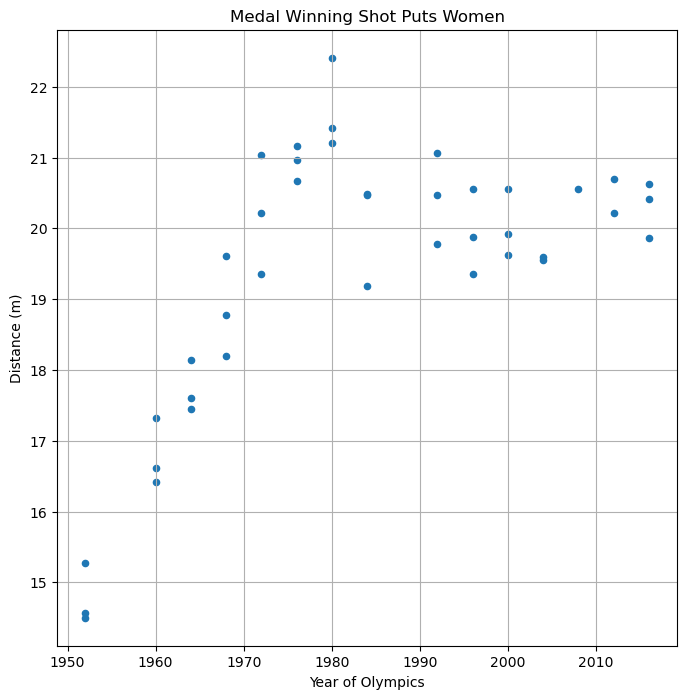

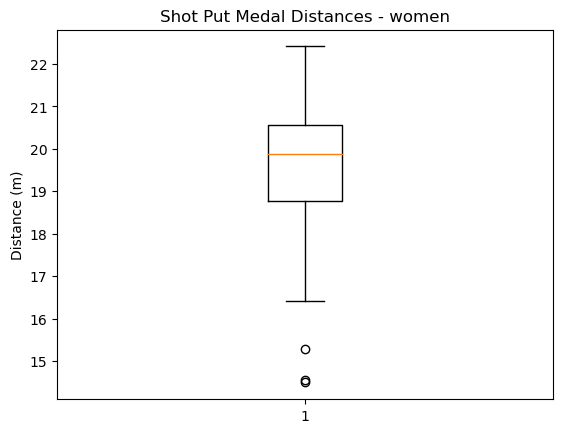

In [285]:
# shot put women create scatter plot
shot_put_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Shot Puts Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/shot put women.png")

# Show the plot
plt.show()

# outlier plot of shot put women distances

times = shot_put_w_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Shot Put Medal Distances - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/shot_put_women.png")

plt.show()

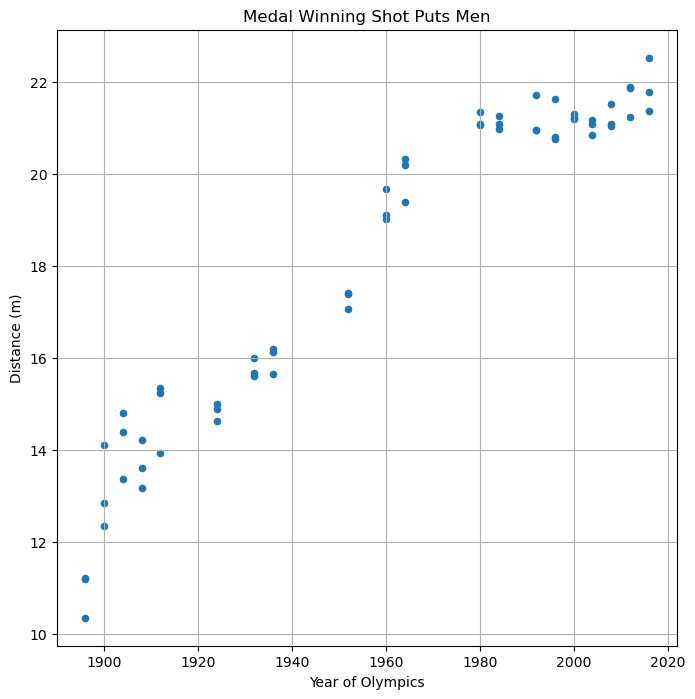

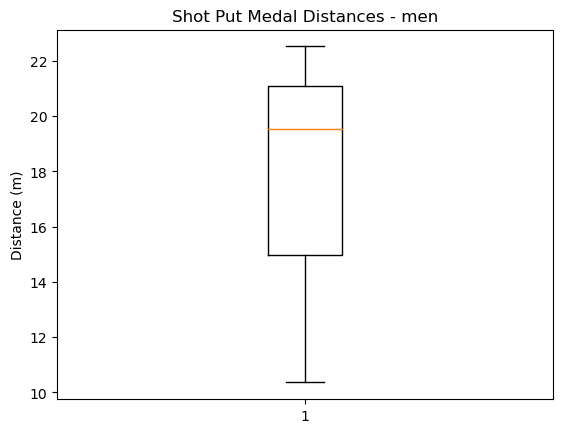

In [286]:
# shot put men create scatter plot
shot_put_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Shot Puts Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/shot put Men.png")

# Show the plot
plt.show()

# outlier plot of shot put men distances

times = shot_put_m_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Shot Put Medal Distances - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(times)

#save the plot
plt.savefig("output_files/boxplots/shot_put_men.png")

plt.show()

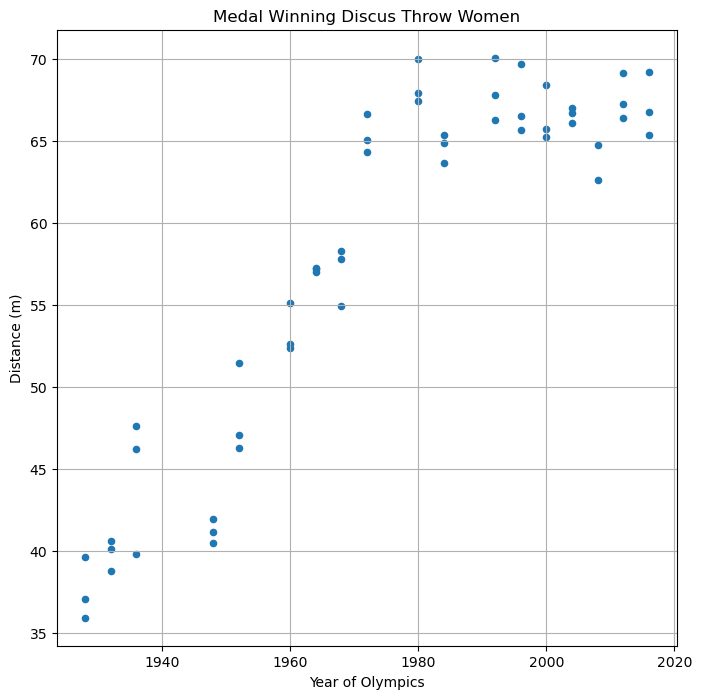

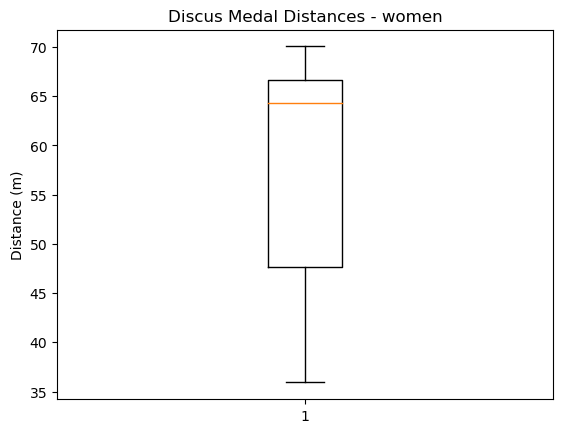

In [288]:
# discus women create scatter plot
discus_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Discus Throw Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/discus women.png")

# Show the plot
plt.show()

# outlier plot of discus women distances

distances = discus_w_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Discus Medal Distances - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(distances)

#save the plot
plt.savefig("output_files/boxplots/discus_women.png")

plt.show()

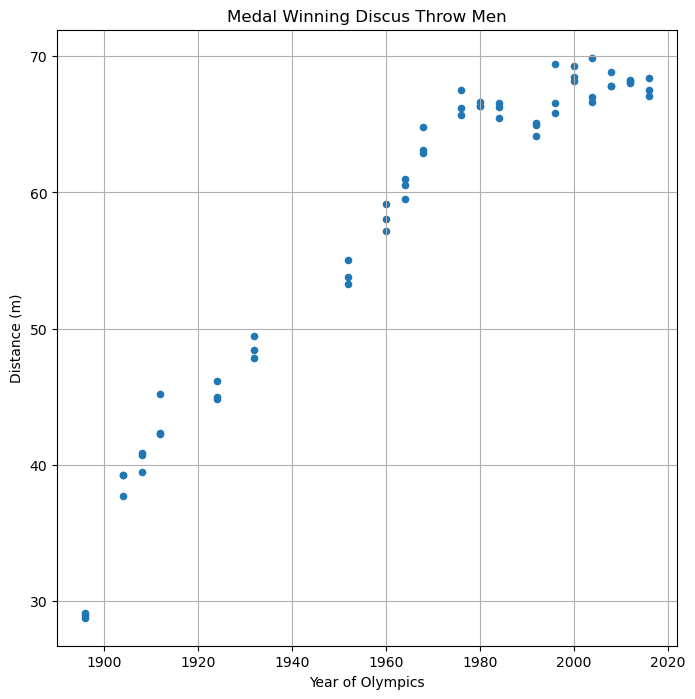

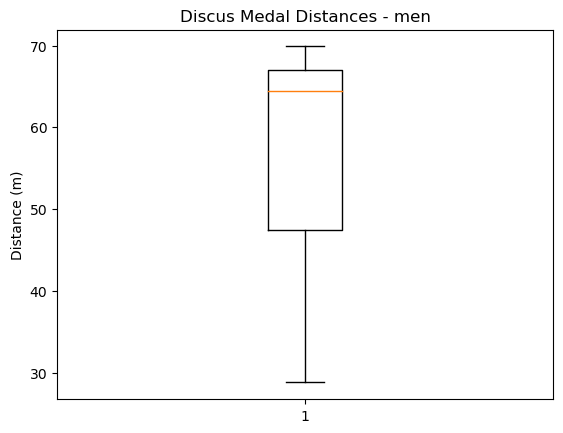

In [289]:
# discus men create scatter plot
discus_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Discus Throw Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/discus men.png")

# Show the plot
plt.show()

# outlier plot of discus men distances

distances = discus_m_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Discus Medal Distances - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(distances)

#save the plot
plt.savefig("output_files/boxplots/discus_men.png")

plt.show()

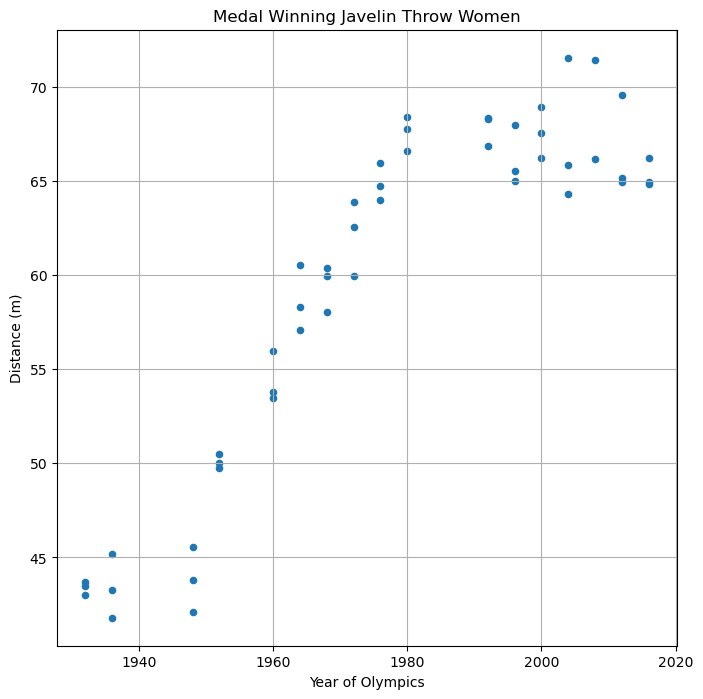

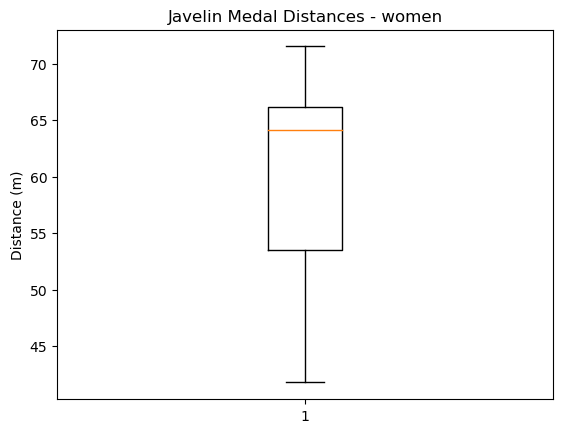

In [290]:
# javelin women create scatter plot
javelin_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Javelin Throw Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/javelin women.png")

# Show the plot
plt.show()

# outlier plot of javelin women distances

distances = javelin_w_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Javelin Medal Distances - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(distances)

#save the plot
plt.savefig("output_files/boxplots/javelin_women.png")

plt.show()

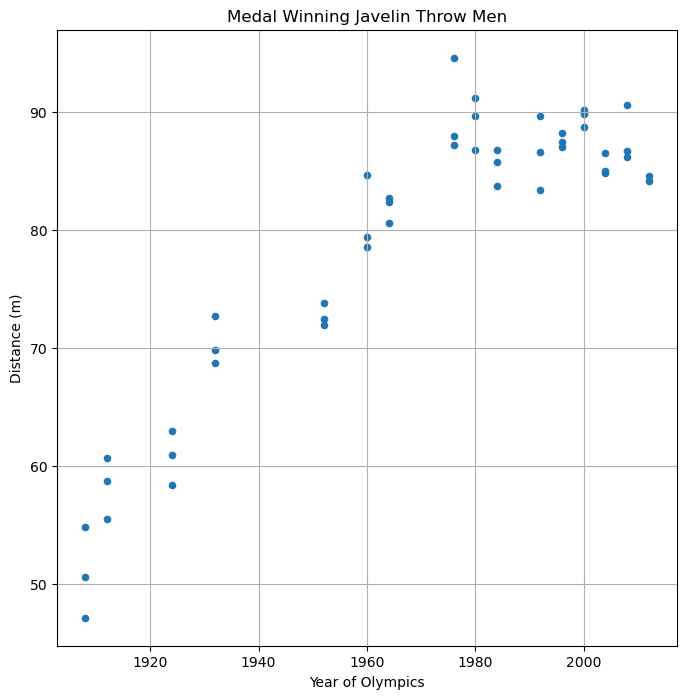

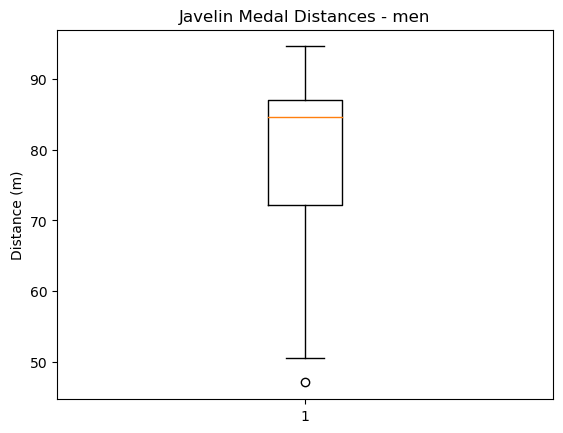

In [293]:
# javelin men create scatter plot
javelin_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Javelin Throw Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/javelin men.png")

# Show the plot
plt.show()

# outlier plot of javelin men distances

distances = javelin_m_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Javelin Medal Distances - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(distances)

#save the plot
plt.savefig("output_files/boxplots/javelin_men.png")

plt.show()

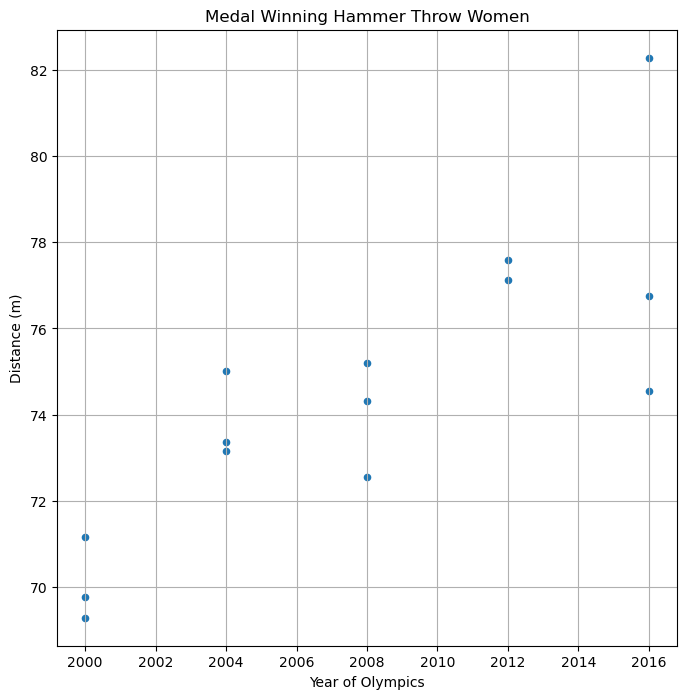

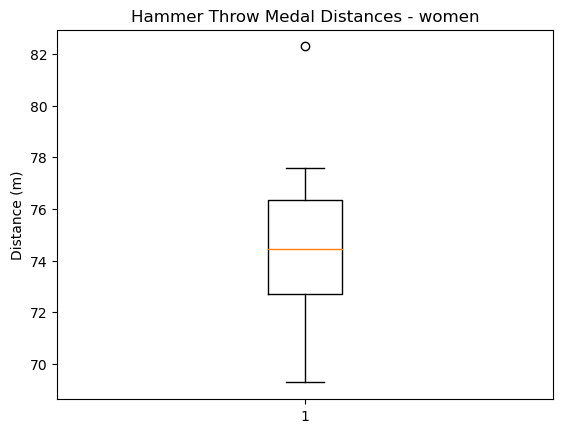

In [294]:
# hammer women create scatter plot
Hammer_Throw_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Hammer Throw Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/hammer women.png")

# Show the plot
plt.show()

# outlier plot of hammer throw women distances

distances = Hammer_Throw_w_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Hammer Throw Medal Distances - women')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(distances)

#save the plot
plt.savefig("output_files/boxplots/hammer_throw_women.png")

plt.show()

An Exceptional Result for Hammer Throw in 2016 - greater than 82 m

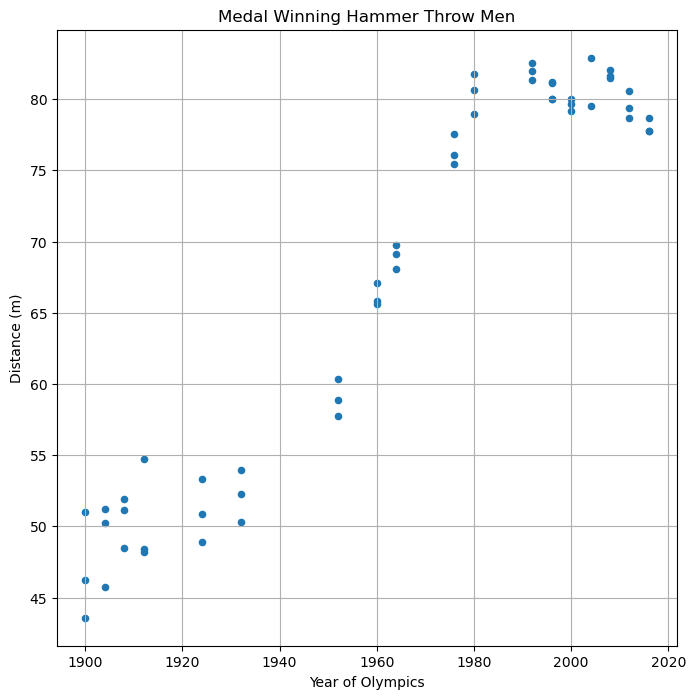

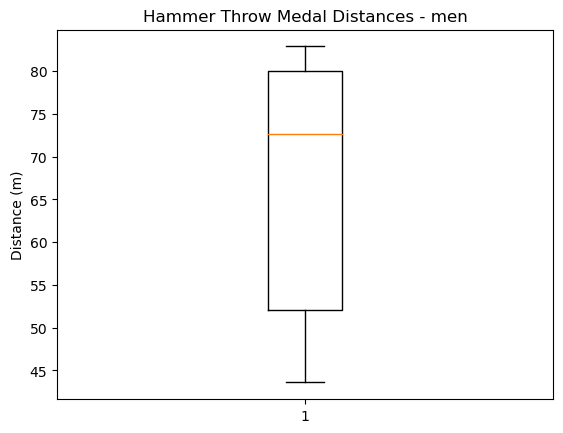

In [295]:
# hammer men create scatter plot
Hammer_Throw_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Hammer Throw Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/scatterplots/hammer men.png")

# Show the plot
plt.show()

# outlier plot of hammer throw men distances

distances = Hammer_Throw_m_df['distance']
fig1, ax1 = plt.subplots()
ax1.set_title('Hammer Throw Medal Distances - men')
ax1.set_ylabel('Distance (m)')
ax1.boxplot(distances)

#save the plot
plt.savefig("output_files/boxplots/hammer_throw_men.png")

plt.show()